In [27]:
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import math
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib.colors
import cartopy.feature as cfeature
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt


### path='/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/'
fname='Mode_Candidate_rv2.nc'
ds=xr.open_dataset(path+fname)
ds

In [28]:
path='/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/'
fname='Mode_Candidate_rv2.nc' 
ds=xr.open_dataset(path+fname) 
cmap =  matplotlib.colors.ListedColormap(['#15B01A','#DDA0DD','#FFA500','#F0E68C','#7BC8F6'])
cmapdiv =  matplotlib.colors.ListedColormap(['#8e0152','#c51b7d','#de77ae','#f1b6da','#fde0ef','#ffffff','#b8e186','#7fbc41','#4d9221','#276419','#014636'])
cmapdiv =  matplotlib.colors.ListedColormap(['#014636','#276419','#4d9221','#7fbc41','#b8e186','#ffffff','#fde0ef','#f1b6da','#de77ae','#c51b7d','#8e0152'])
cmapdiv =  matplotlib.colors.ListedColormap(['#014636','#276419','#4d9221','#7fbc41','#b8e186','#ffffff','#f6e8c3','#dfc27d','#bf812d','#8c510a','#543005'])

cmapdiv2=  matplotlib.colors.ListedColormap(['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#ffffff','#ffffff','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061','#000000'])
cmapdiv2=  matplotlib.colors.ListedColormap(['#7f3b08','#b35806','#e08214','#fdb863','#fee0b6','#ffffff','#ffffff','#d8daeb','#b2abd2','#8073ac','#542788','#2d004b','#000000'])
cmap2 =  matplotlib.colors.ListedColormap(['#E066FF','#00EEEE','#CAFF70','#FF6103','#EE3B3B','#8A360F'])
cmapg = matplotlib.colors.ListedColormap(['#969696','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704'])
ds

<xarray.Dataset>
Dimensions:                       (lat: 90, lon: 180)
Dimensions without coordinates: lat, lon
Data variables:
    LAT                           (lat) float64 ...
    LON                           (lon) float64 ...
    Mode_Candidate_CTRL           (lat, lon) float64 ...
    Mode_Candidate_1CO2           (lat, lon) float64 ...
    Regime_migrate_sig_Mode7      (lat, lon) float64 ...
    Regime_migrate_sig_Mode7_num  (lat, lon) float64 ...
    Diverge_con                   (lat, lon) float64 ...
    Diverge_exp                   (lat, lon) float64 ...
    Diverge_con_dry               (lat, lon) float64 ...
    Diverge_exp_dry               (lat, lon) float64 ...
    Diverge_con_tran              (lat, lon) float64 ...
    Diverge_exp_tran              (lat, lon) float64 ...
    Diverge_con_wet               (lat, lon) float64 ...
    Diverge_exp_wet               (lat, lon) float64 ...
    Diverge_con_full              (lat, lon) float64 ...
    Diverge_exp_full              (lat, lon) float64 ...
    Regime_migrate_sig_Mode8      (lat, lon) float64 ...
    Regime_migrate_sig_Mode8_num  (lat, lon) float64 ...

In [29]:
ds_ctrl=ds.Mode_Candidate_CTRL
ds_exp=ds.Mode_Candidate_1CO2
ds1=np.array(ds_ctrl)[:,0:90]
ds2=np.array(ds_ctrl)[:,90:180]
ds_ctrl=np.concatenate((ds2, ds1), axis=1)
ds1=np.array(ds_exp)[:,0:90]
ds2=np.array(ds_exp)[:,90:180]
ds_exp=np.concatenate((ds2, ds1), axis=1)
ds.LAT

<xarray.DataArray 'LAT' (lat: 90)>
array([-89., -87., -85., -83., -81., -79., -77., -75., -73., -71., -69., -67.,
       -65., -63., -61., -59., -57., -55., -53., -51., -49., -47., -45., -43.,
       -41., -39., -37., -35., -33., -31., -29., -27., -25., -23., -21., -19.,
       -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
         7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
        31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,
        55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,
        79.,  81.,  83.,  85.,  87.,  89.])
Dimensions without coordinates: lat

/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the 

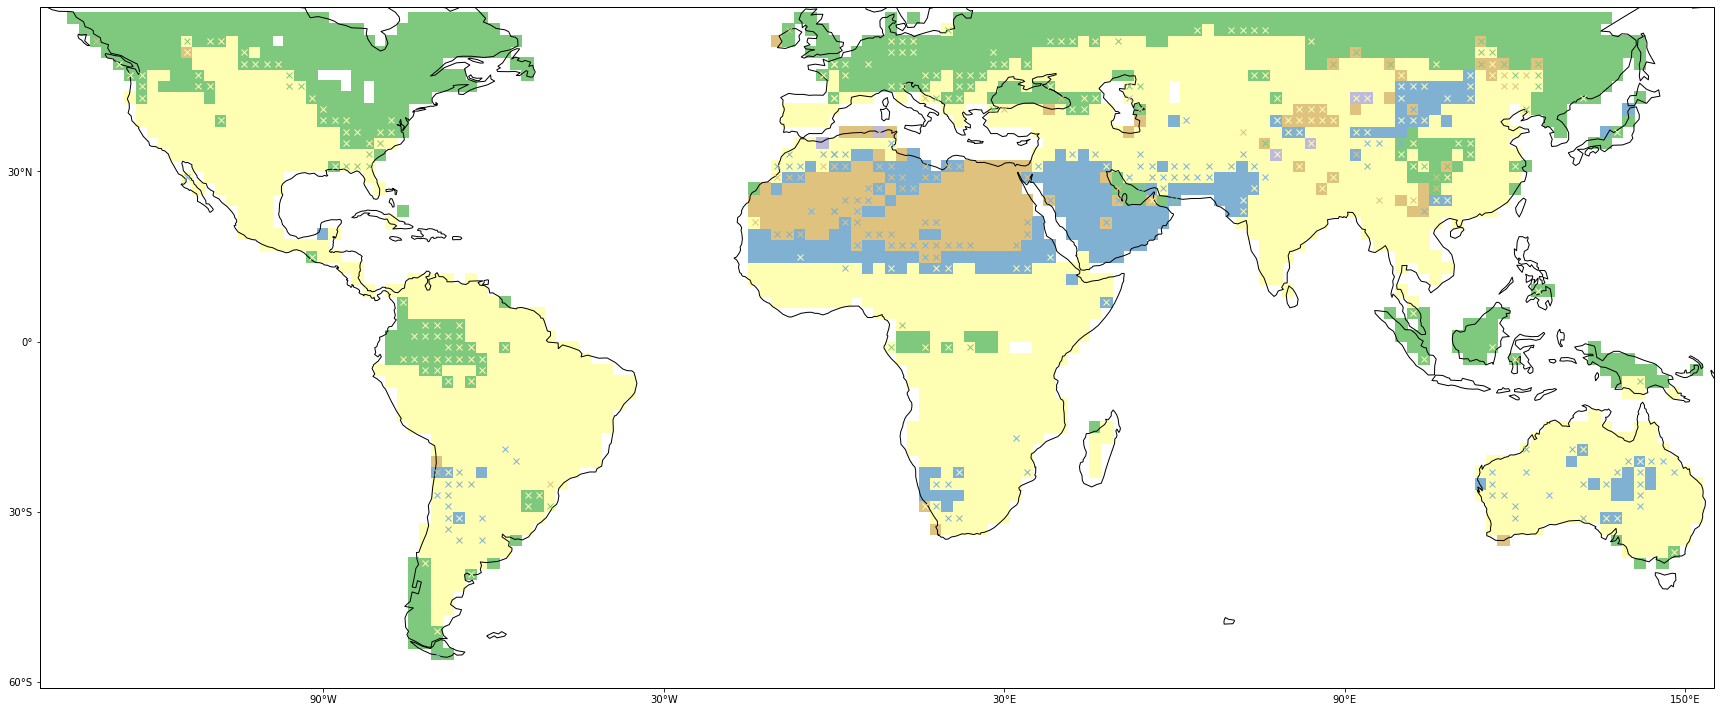

In [30]:
#cmap =  matplotlib.colors.ListedColormap(['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0'])
cmap =  matplotlib.colors.ListedColormap(['#7fc97f','#bebada','#fb8072','#ffffb3','#80b1d3'])
cmap =  matplotlib.colors.ListedColormap(['#7fc97f','#bebada','#dfc27d','#ffffb3','#80b1d3'])

fig = plt.figure(figsize=(30,18))
ax=plt.axes(projection=ccrs.PlateCarree())
data=ds_ctrl
data, lons = add_cyclic_point(data, ds.LON)
data2=ds_exp
data2, lons = add_cyclic_point(data2, ds.LON)
cs=ax.pcolor(lons-1, ds.LAT-1,data, transform = ccrs.PlateCarree(),shading='flat',cmap=cmap,vmin=0.5, vmax=5.5)
ax.coastlines()
ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# Add colorbar
plt.xlim(-140,155)
plt.ylim(-61,59)
difmr3=data2-data
a=np.where(difmr3==0);
data2[a]=0;
#cmap =  matplotlib.colors.ListedColormap(['#15B01A','#DDA0DD','#FFA500','#F0E68C','#7BC8F6'])
#cmap =  matplotlib.colors.ListedColormap(['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0'])
b1=np.where(data2==1)
plt.plot(lons[b1[1]],ds.LAT[b1[0]], 'x',color='#7fc97f')
plt.plot(lons[b1[1]]-360,ds.LAT[b1[0]], 'x',color='#7fc97f')
b2=np.where(data2==2)
plt.plot(lons[b2[1]],ds.LAT[b2[0]], 'x',color='#bebada')
plt.plot(lons[b2[1]]-360,ds.LAT[b2[0]], 'x',color='#bebada')
b3=np.where(data2==3)
plt.plot(lons[b3[1]],ds.LAT[b3[0]], 'x',color='#dfc27d')
plt.plot(lons[b3[1]]-360,ds.LAT[b3[0]], 'x',color='#dfc27d')
b4=np.where(data2==4)
plt.plot(lons[b4[1]],ds.LAT[b4[0]], 'x',color='#ffffb3')
plt.plot(lons[b4[1]]-360,ds.LAT[b4[0]], 'x',color='#ffffb3')
b5=np.where(data2==5)
plt.plot(lons[b5[1]],ds.LAT[b5[0]], 'x',color='#80b1d3')
plt.plot(lons[b5[1]]-360,ds.LAT[b5[0]], 'x',color='#80b1d3')
plt.savefig('P3F2_mode_rv3.pdf')

In [31]:
lons[b5[1]]

masked_array(data=[290., 294., 298., 292.,  20.,  22., 120., 132., 292.,
                   298.,  18., 120., 142., 292., 116., 118., 126., 142.,
                   290., 292.,  18.,  20., 116., 132., 136., 142., 292.,
                   294., 296.,  34., 116., 122., 138., 142., 148., 294.,
                   140., 144., 146., 304., 122., 130., 302.,  32.,   2.,
                    16.,  18.,   4.,  10.,  12.,  14.,  16.,  18.,  20.,
                    22.,  24.,  32.,   6.,   8.,  10.,  34., 350., 352.,
                     4.,  16.,  18.,  34.,  48.,   0.,   4., 104., 356.,
                   360.,   2.,   4.,   6.,  38.,  50.,   6.,  54.,  58.,
                    52.,  56.,  58.,  60.,  62.,  64.,  66.,  76., 246.,
                    36.,  54.,  56.,  60.,  62.,  66.,  70.,  74.,  94.,
                   350., 352., 354.,   0.,   2.,  42.,  46.,  54.,  72.,
                   352., 358., 360.,  10.,  94.,  96., 100.,  62., 102.],
             mask=False,
       fill_value=1e+20)

/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not posit

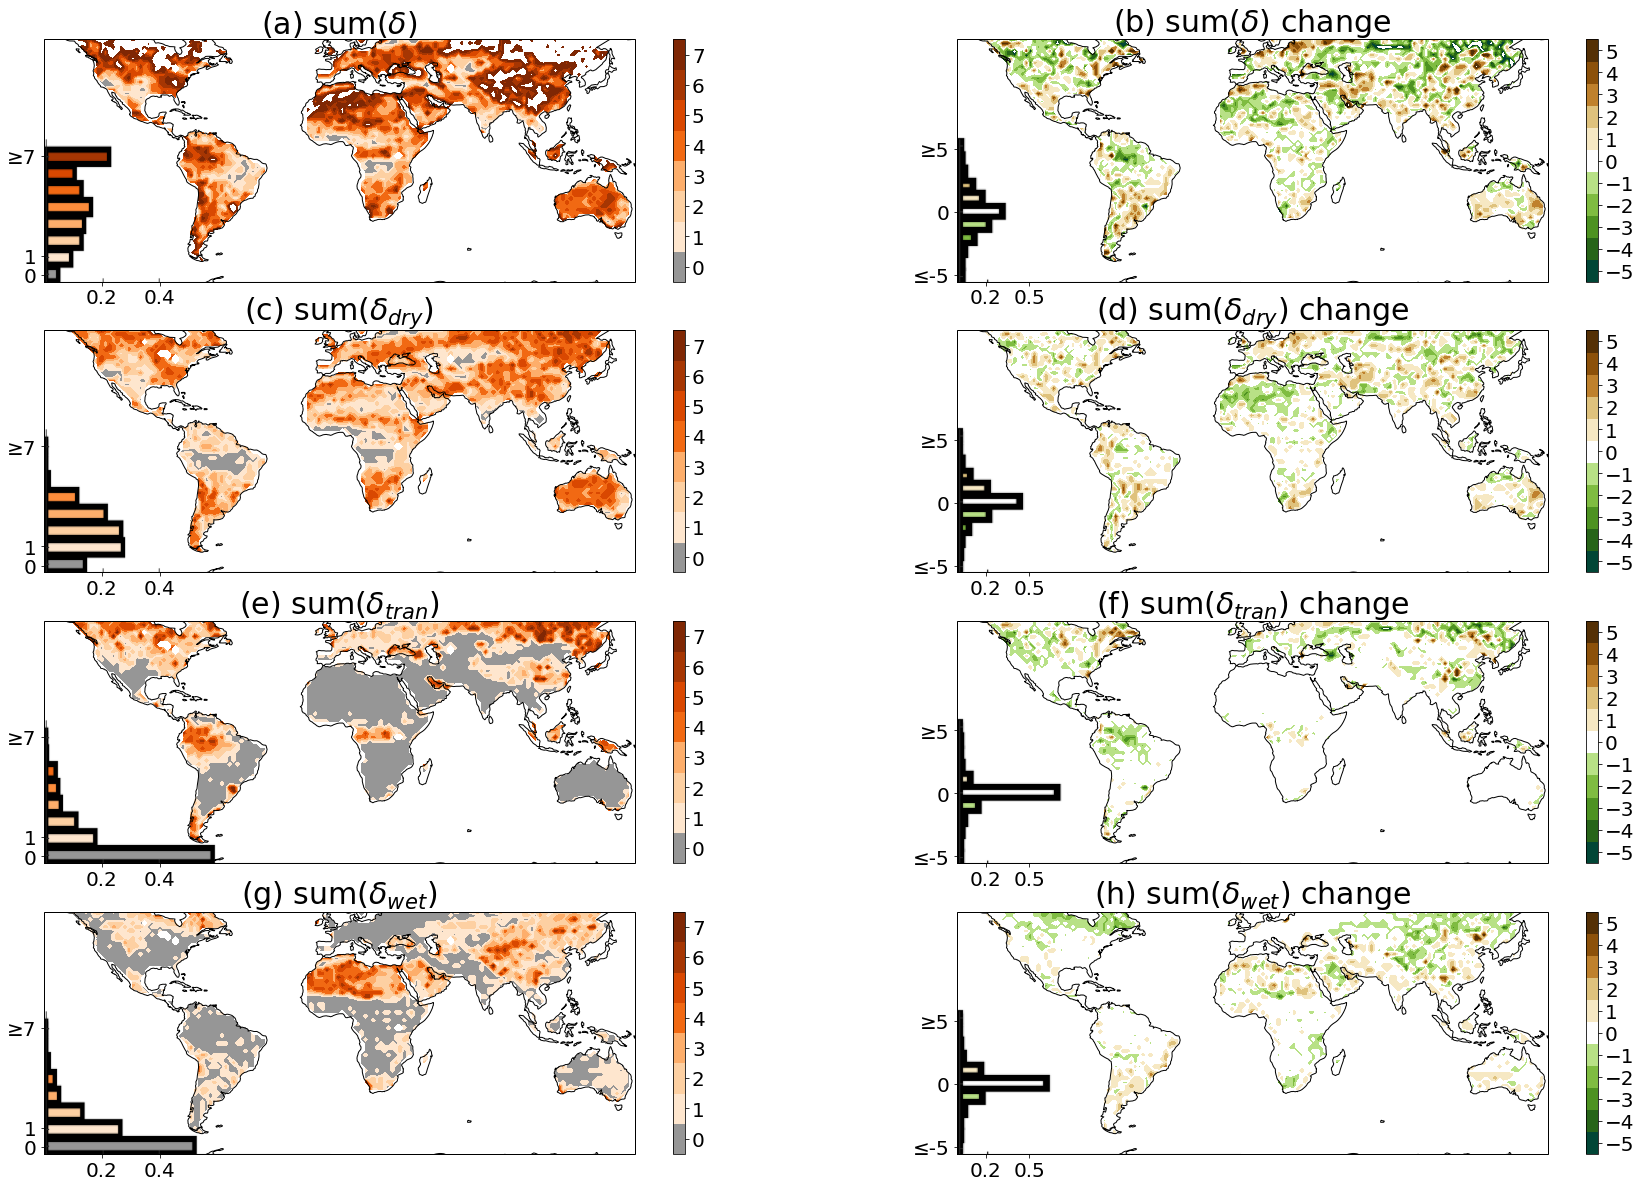

In [59]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import cv2

clevs=np.arange(-0.5,8.5,1)
boundaries = [-0.5, .5, 1.5, 2.5, 3.5,4.5,5.5,6.5,7.5]
norm = colors.BoundaryNorm(np.arange(-0.5,7.5), cmapdiv.N)
axins = inset_axes(ax,
                    width="100%",  
                    height="5%",
                    loc='lower center',
                    borderpad=-5
                   )
fig, axs = plt.subplots(nrows=4,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(30,20.5))
axs=axs.flatten()
ds1=np.array(ds.Diverge_con_full)[:,0:90]
ds2=np.array(ds.Diverge_con_full)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[0].contourf(lons,ds.LAT,data,clevs, 
                          transform = ccrs.PlateCarree(),
                          cmap=cmapg)
cbar = plt.colorbar(cs,ax=axs[0],ticks=np.linspace(0,7,8))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[0].set_title('(a) sum($\u03B4$)',size=30)
axs[0].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_full_v2.png")
im = cv2.flip(im, 0)
im = axs[0].imshow(im, extent=[-174, 15, -87, 15])
axs[0].set_xticks([-120, -90])
axs[0].set_xticklabels(["0.2", "0.4"],size=20)
axs[0].set_xticks([-120, -90])
axs[0].set_xticklabels(["0.2", "0.4"],size=20)
axs[0].set_yticks([-62.5,-52.5,-1])
axs[0].set_yticklabels(["0", "1","≥7"],size=20)

ds1=np.array(ds.Diverge_con_dry)[:,0:90]
ds2=np.array(ds.Diverge_con_dry)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[2].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapg)
cbar = plt.colorbar(cs,ax=axs[2],ticks=np.linspace(0,7,8))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[2].set_title('(c) sum($\u03B4_{dry}$)',size=30)
axs[2].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_dry_v2.png")
im = cv2.flip(im, 0)
im = axs[2].imshow(im, extent=[-174, 15, -87, 15])
axs[2].set_xticks([-120, -90])
axs[2].set_xticklabels(["0.2", "0.4"],size=20)
axs[2].set_xticks([-120, -90])
axs[2].set_xticklabels(["0.2", "0.4"],size=20)
axs[2].set_yticks([-62.5,-52.5,-1])
axs[2].set_yticklabels(["0", "1","≥7"],size=20)
ds1=np.array(ds.Diverge_con_tran)[:,0:90]
ds2=np.array(ds.Diverge_con_tran)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[4].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapg)
cbar = plt.colorbar(cs,ax=axs[4],ticks=np.linspace(0,7,8))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[4].set_title('(e) sum($\u03B4_{tran}$)',size=30)
axs[4].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_tran_v2.png")
im = cv2.flip(im, 0)
im = axs[4].imshow(im, extent=[-174, 15, -87, 15])
axs[4].set_xticks([-120, -90])
axs[4].set_xticklabels(["0.2", "0.4"],size=20)
axs[4].set_xticks([-120, -90])
axs[4].set_xticklabels(["0.2", "0.4"],size=20)
axs[4].set_yticks([-62.5,-52.5,-1])
axs[4].set_yticklabels(["0", "1","≥7"],size=20)
ds1=np.array(ds.Diverge_con_wet)[:,0:90]
ds2=np.array(ds.Diverge_con_wet)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[6].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapg)
cbar = plt.colorbar(cs,ax=axs[6],ticks=np.linspace(0,7,8))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[6].set_title('(g) sum($\u03B4_{wet}$)',size=30)
axs[6].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_wet_v2.png")
im = cv2.flip(im, 0)
im = axs[6].imshow(im, extent=[-174, 15, -87, 15])
axs[6].set_xticks([-120, -90])
axs[6].set_xticklabels(["0.2", "0.4"],size=20)
axs[6].set_xticks([-120, -90])
axs[6].set_xticklabels(["0.2", "0.4"],size=20)
axs[6].set_yticks([-62.5,-52.5,-1])
axs[6].set_yticklabels(["0", "1","≥7"],size=20)
clevs=np.arange(-5.5,6.5,1)
boundaries = [-5.5, -4.5, -3.5, -2.5, -1.5,0.5, 0.5, 1.5, 2.5,3.5,4.5,5.5]
norm = colors.BoundaryNorm(np.arange(-5.5,6.5), cmapdiv.N)
ds1=np.array(ds.Diverge_con_full)[:,0:90]
ds2=np.array(ds.Diverge_con_full)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
ds1=np.array(ds.Diverge_exp_full)[:,0:90]
ds2=np.array(ds.Diverge_exp_full)[:,90:180]
data2=np.concatenate((ds2, ds1), axis=1)
data=data2-data
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[1].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapdiv)
cbar = plt.colorbar(cs,ax=axs[1],ticks=np.linspace(-5,5,11))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[1].set_title('(b) sum($\u03B4$) change',size=30)
axs[1].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_dif_full_v2.png")
im = cv2.flip(im, 0)
im = axs[1].imshow(im, extent=[-180, 15, -87, 15])
axs[1].set_xticks([-135, -112.5])
axs[1].set_xticklabels(["0.2", "0.5"],size=20)
axs[1].set_yticks([-62.5,-30,2.5])
axs[1].set_yticklabels(["≤-5", "0","≥5"],size=20)


ds1=np.array(ds.Diverge_con_dry)[:,0:90]
ds2=np.array(ds.Diverge_con_dry)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
ds1=np.array(ds.Diverge_exp_dry)[:,0:90]
ds2=np.array(ds.Diverge_exp_dry)[:,90:180]
data2=np.concatenate((ds2, ds1), axis=1)
data=data2-data
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[3].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapdiv)
cbar = plt.colorbar(cs,ax=axs[3],ticks=np.linspace(-5,5,11))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[3].set_title('(d) sum($\u03B4_{dry}$) change',size=30)
axs[3].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_dif_dry_v2.png")
im = cv2.flip(im, 0)
im = axs[3].imshow(im, extent=[-180, 15, -87, 15])
axs[3].set_xticks([-135, -112.5])
axs[3].set_xticklabels(["0.2", "0.5"],size=20)
axs[3].set_yticks([-62.5,-30,2.5])
axs[3].set_yticklabels(["≤-5", "0","≥5"],size=20)
ds1=np.array(ds.Diverge_con_tran)[:,0:90]
ds2=np.array(ds.Diverge_con_tran)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
ds1=np.array(ds.Diverge_exp_tran)[:,0:90]
ds2=np.array(ds.Diverge_exp_tran)[:,90:180]
data2=np.concatenate((ds2, ds1), axis=1)
data=data2-data
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[5].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapdiv)
cbar = plt.colorbar(cs,ax=axs[5],ticks=np.linspace(-5,5,11))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[5].set_title('(f) sum($\u03B4_{tran}$) change',size=30)
axs[5].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_dif_tran_v2.png")
im = cv2.flip(im, 0)
im = axs[5].imshow(im, extent=[-180, 15, -87, 15])
axs[5].set_xticks([-135, -112.5])
axs[5].set_xticklabels(["0.2", "0.5"],size=20)
axs[5].set_yticks([-62.5,-30,2.5])
axs[5].set_yticklabels(["≤-5", "0","≥5"],size=20)
ds1=np.array(ds.Diverge_con_wet)[:,0:90]
ds2=np.array(ds.Diverge_con_wet)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
ds1=np.array(ds.Diverge_exp_wet)[:,0:90]
ds2=np.array(ds.Diverge_exp_wet)[:,90:180]
data2=np.concatenate((ds2, ds1), axis=1)
data=data2-data
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[7].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),
                          cmap=cmapdiv)
cbar = plt.colorbar(cs,ax=axs[7],ticks=np.linspace(-5,5,11))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[7].set_title('(h) sum($\u03B4_{wet}$) change',size=30)
axs[7].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_dif_wet_v2.png")
im = cv2.flip(im, 0)
im = axs[7].imshow(im, extent=[-180, 15, -87, 15])
axs[7].set_xticks([-135, -112.5])
axs[7].set_xticklabels(["0.2", "0.5"],size=20)
axs[7].set_yticks([-62.5,-30,2.5])
axs[7].set_yticklabels(["≤-5", "0","≥5"],size=20)
for (m), subplot in np.ndenumerate(axs):
    subplot.set_xlim(-150,155)
    subplot.set_ylim(-66,59)

plt.savefig('P3F3_delta_v2.pdf')

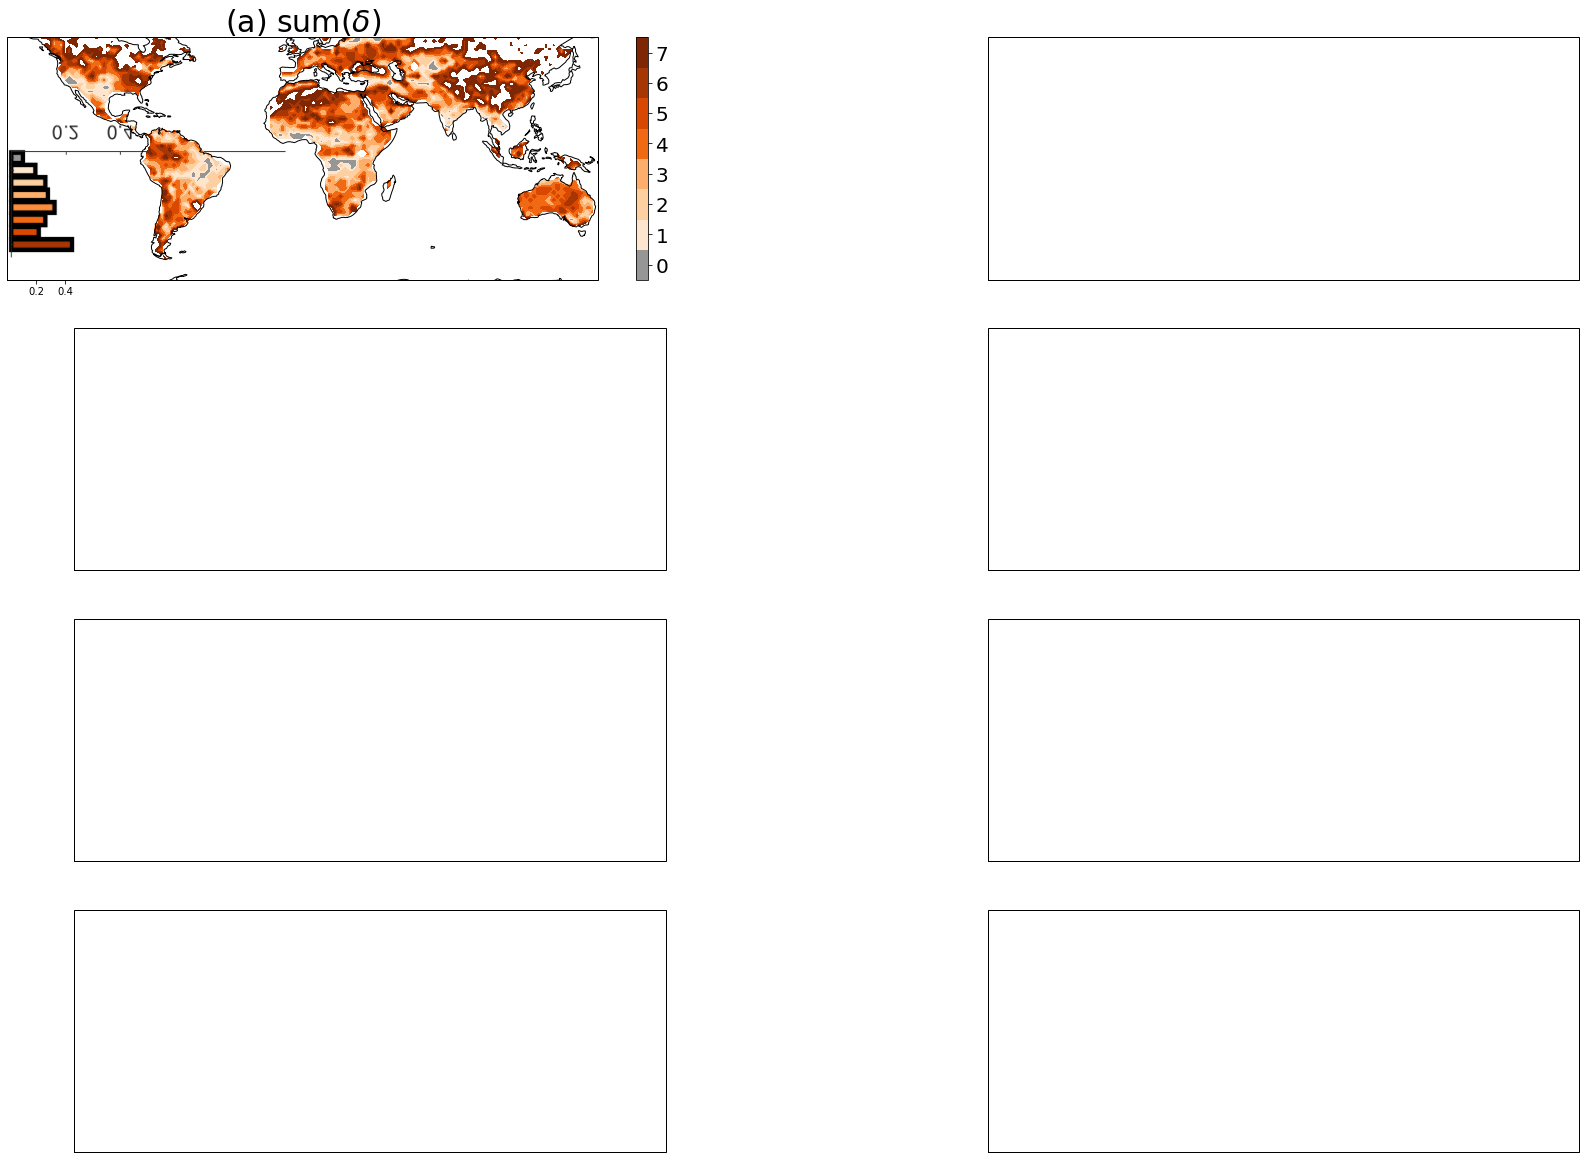

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
#import cv2

clevs=np.arange(-0.5,8.5,1)
boundaries = [-0.5, .5, 1.5, 2.5, 3.5,4.5,5.5,6.5,7.5]
norm = colors.BoundaryNorm(np.arange(-0.5,7.5), cmapdiv.N)
axins = inset_axes(ax,
                    width="100%",  
                    height="5%",
                    loc='lower center',
                    borderpad=-5
                   )
fig, axs = plt.subplots(nrows=4,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(30,20.5))
axs=axs.flatten()
ds1=np.array(ds.Diverge_con_full)[:,0:90]
ds2=np.array(ds.Diverge_con_full)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[0].contourf(lons,ds.LAT,data,clevs, 
                          transform = ccrs.PlateCarree(),
                          cmap=cmapg)
cbar = plt.colorbar(cs,ax=axs[0],ticks=np.linspace(0,7,8))
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[0].set_title('(a) sum($\u03B4$)',size=30)
axs[0].coastlines()

im = plt.imread("/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/histogram_full_v2.png")
#im = cv2.flip(im, 0)
im = axs[0].imshow(im, extent=[-172, 10, -60, 15])

axs[0].set_xticks([-135, -120])
axs[0].set_xticklabels(["0.2", "0.4"])
for (m), subplot in np.ndenumerate(axs):
    subplot.set_xlim(-150,155)
    subplot.set_ylim(-66,59)


/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/hhsu/.conda/envs/aoes/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the 

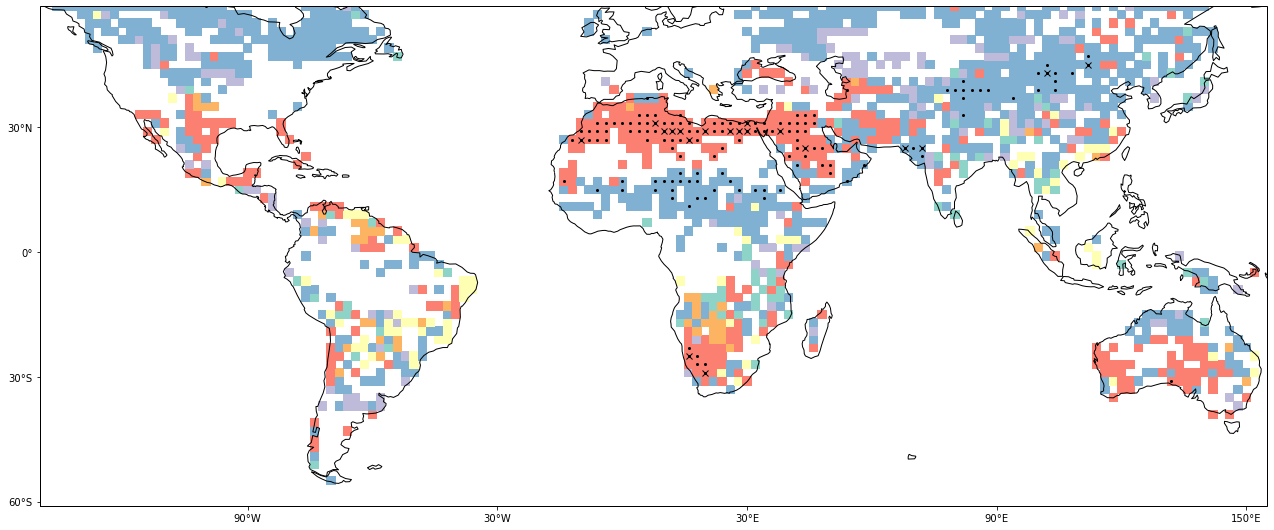

In [60]:
ds_ctrl=ds.Regime_migrate_sig_Mode8

cmap2 =  matplotlib.colors.ListedColormap(['#1C86EE','#00EEEE','#CAFF70','#FF6103','#DC143C','#8A360F'])
cmap2 =  matplotlib.colors.ListedColormap(['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc'])
cmap2 =  matplotlib.colors.ListedColormap(['#bebada','#8dd3c7','#80b1d3','#ffffb3','#fb8072','#fdb462'])
fig = plt.figure(figsize=(22,16))
ax=plt.axes(projection=ccrs.PlateCarree())
data=ds_ctrl
data, lons = add_cyclic_point(data, ds.LON)
data2=ds_exp
data2, lons = add_cyclic_point(data2, ds.LON)
cs=ax.pcolor(lons-1, ds.LAT-1,data, transform = ccrs.PlateCarree(),shading='flat',cmap=cmap2,vmin=0.5, vmax=6.5)
ax.coastlines()
ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# Add colorbar
plt.xlim(-140,155)
plt.ylim(-61,59)
difmr3=data2-data
a=np.where(difmr3==0);
data2[a]=0;
#cbar = plt.colorbar(cs,ax=ax, ticks=[1,2,3,4,5,6])

data2=ds.Regime_migrate_sig_Mode8_num

b1=np.where(data2>4)
plt.plot(lons[b1[1]],ds.LAT[b1[0]], '.',markersize=4,color='#000000')
plt.plot(lons[b1[1]]-360,ds.LAT[b1[0]], '.',markersize=4,color='#000000')
b1=np.where(data2>6)
plt.plot(lons[b1[1]],ds.LAT[b1[0]], 'x',color='#000000')
plt.plot(lons[b1[1]]-360,ds.LAT[b1[0]], 'x',color='#000000')
#cbar = plt.colorbar(cs)
plt.savefig('P3F5_migrate_Mode_v3.pdf')

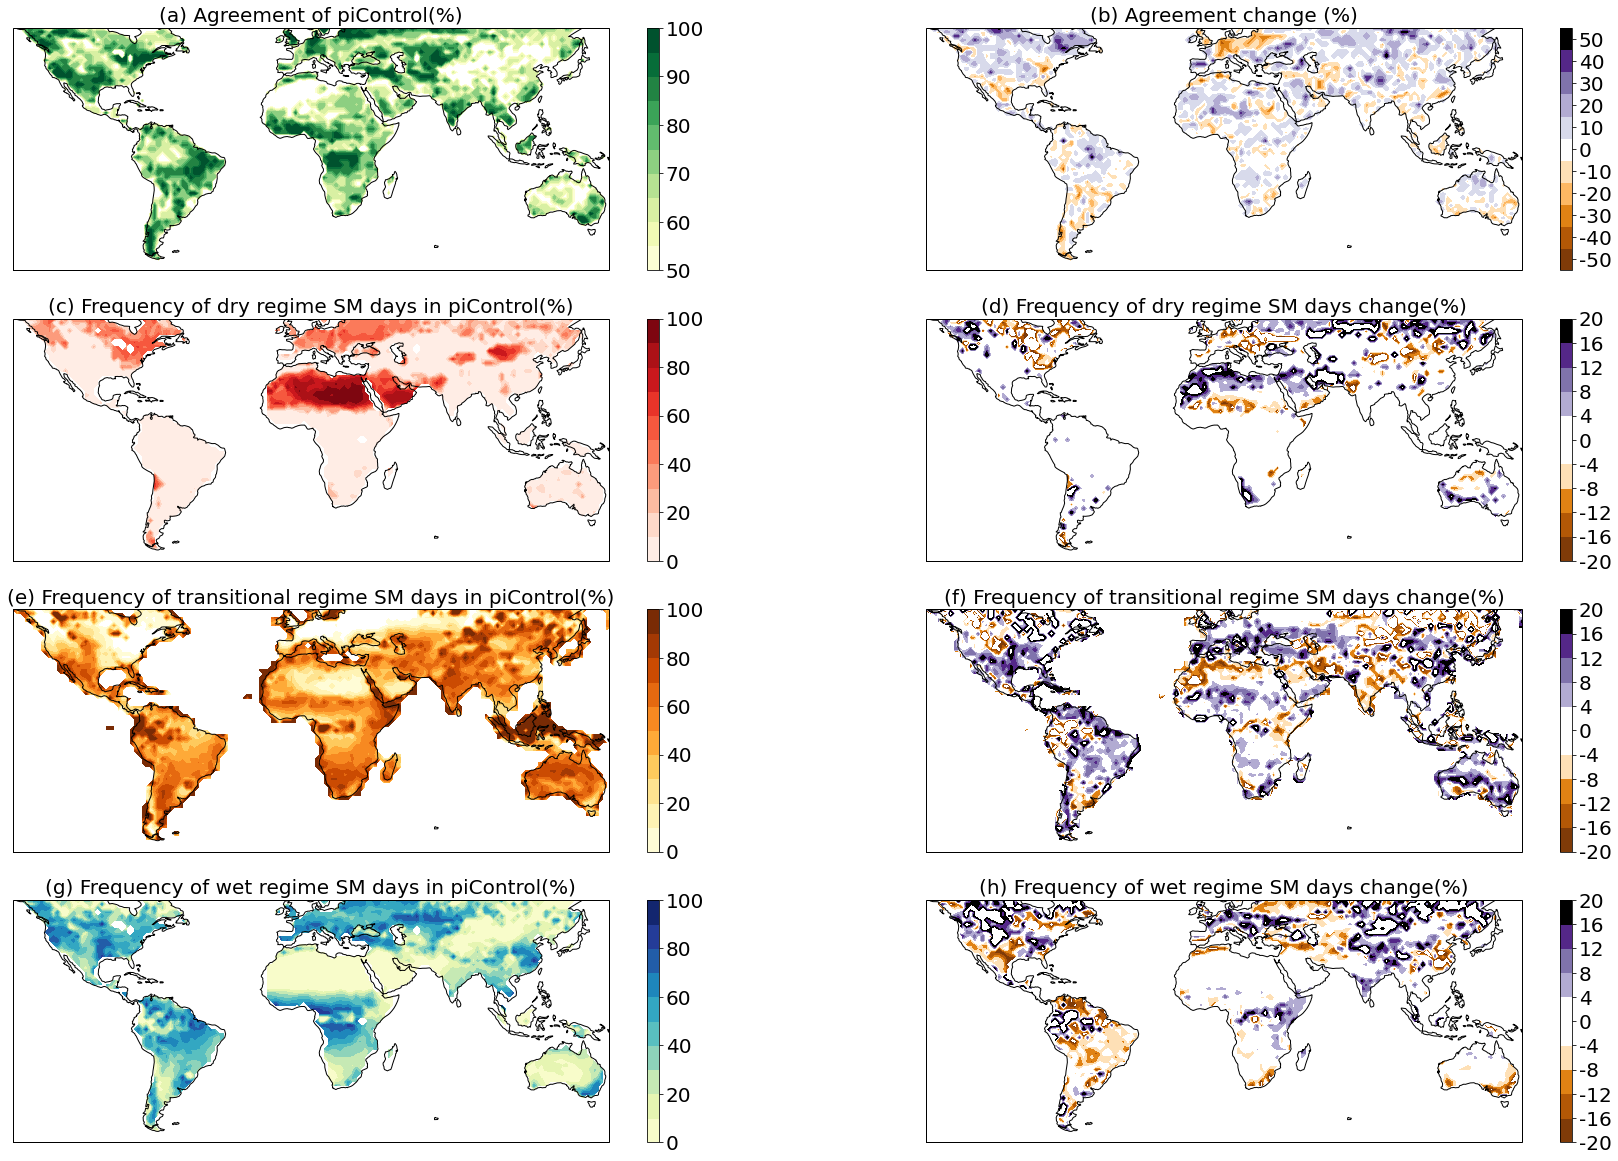

In [7]:
clevs=np.arange(50,105,5)
fig, axs = plt.subplots(nrows=4,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(30,20.5))
axs=axs.flatten()
ds1=np.array(ds.Mode_Agreement_con)[:,0:90]
ds2=np.array(ds.Mode_Agreement_con)[:,90:180]
data=np.concatenate((ds2, ds1), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[0].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),cmap='YlGn')
cbar = plt.colorbar(cs,ax=axs[0])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[0].set_title('(a) Agreement of piControl(%)',size=20)
axs[0].coastlines()

clevs=np.arange(-55,65,10)
boundaries = [-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55]
norm = colors.BoundaryNorm(np.arange(-55,65,10), cmapdiv2.N)
ds1=np.array(ds.Mode_Agreement_exp)[:,0:90]
ds2=np.array(ds.Mode_Agreement_exp)[:,90:180]
data2=np.concatenate((ds2, ds1), axis=1)
data2,lons=add_cyclic_point(data2,coord=ds.LON)
data=data2-data
data[abs(data) < 1] ==np.nan

cs=axs[1].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),cmap=cmapdiv2)
cbar = plt.colorbar(cs,ax=axs[1], ticks=[-50 , -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
cbar.ax.set_yticklabels(['-50' , '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50'])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[1].set_title('(b) Agreement change (%)',size=20)
axs[1].coastlines()

clevs=np.arange(0,110,10)

ds1=np.array(ds.Fraction_dry_con_md)[:,0:90]
ds2=np.array(ds.Fraction_dry_con_md)[:,90:180]
data=np.concatenate((ds1, ds2), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[2].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),cmap='Reds')
cbar = plt.colorbar(cs,ax=axs[2])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[2].set_title('(c) Frequency of dry regime SM days in piControl(%)',size=20)
axs[2].coastlines()

clevs=np.arange(-20,24,4)
boundaries = [-20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24]
norm = colors.BoundaryNorm(np.arange(-20,24,4), cmapdiv2.N)
ds1=np.array(ds.Fraction_dry_exp_md)[:,0:90]
ds2=np.array(ds.Fraction_dry_exp_md)[:,90:180]
data2=np.concatenate((ds1, ds2), axis=1)
data2,lons=add_cyclic_point(data2,coord=ds.LON)
data=data2-data
data[abs(data) < 1] ==np.nan

cs=axs[3].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),cmap=cmapdiv2)
cbar = plt.colorbar(cs,ax=axs[3], ticks=[-20 , -16, -12, -8, -4, 0, 4, 8, 12, 16, 20])
cbar.ax.set_yticklabels(['-20' , '-16', '-12', '-8', '-4', '0', '4', '8', '12', '16', '20'])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[3].set_title('(d) Frequency of dry regime SM days change(%)',size=20)
axs[3].coastlines()


clevs=np.arange(0,110,10)
ds1=np.array(ds.Fraction_tran_con_md)[:,0:90]
ds2=np.array(ds.Fraction_tran_con_md)[:,90:180]
data=np.concatenate((ds1, ds2), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[4].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),cmap='YlOrBr')
cbar = plt.colorbar(cs,ax=axs[4])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[4].set_title('(e) Frequency of transitional regime SM days in piControl(%)',size=20)
axs[4].coastlines()

clevs=np.arange(-20,24,4)
boundaries = [-20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20]
norm = colors.BoundaryNorm(np.arange(-20,24,4), cmapdiv2.N)
ds1=np.array(ds.Fraction_tran_exp_md)[:,0:90]
ds2=np.array(ds.Fraction_tran_exp_md)[:,90:180]
data2=np.concatenate((ds1, ds2), axis=1)
data2,lons=add_cyclic_point(data2,coord=ds.LON)
data=data2-data
data[abs(data) < 1] ==np.nan

cs=axs[5].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),cmap=cmapdiv2)
cbar = plt.colorbar(cs,ax=axs[5], ticks=[-20 , -16, -12, -8, -4, 0, 4, 8, 12, 16, 20])
cbar.ax.set_yticklabels(['-20' , '-16', '-12', '-8', '-4', '0', '4', '8', '12', '16', '20'])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[5].set_title('(f) Frequency of transitional regime SM days change(%)',size=20)
axs[5].coastlines()

clevs=np.arange(0,110,10)

ds1=np.array(ds.Fraction_wet_con_md)[:,0:90]
ds2=np.array(ds.Fraction_wet_con_md)[:,90:180]
data=np.concatenate((ds1, ds2), axis=1)
data,lons=add_cyclic_point(data,coord=ds.LON)
cs=axs[6].contourf(lons,ds.LAT,data,clevs,
                          transform = ccrs.PlateCarree(),cmap='YlGnBu')
cbar = plt.colorbar(cs,ax=axs[6])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[6].set_title('(g) Frequency of wet regime SM days in piControl(%)',size=20)
axs[6].coastlines()

clevs=np.arange(-20,24,4)
boundaries = [-20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20]
norm = colors.BoundaryNorm(np.arange(-20,24,4), cmapdiv2.N)
ds1=np.array(ds.Fraction_wet_exp_md)[:,0:90]
ds2=np.array(ds.Fraction_wet_exp_md)[:,90:180]
data2=np.concatenate((ds1, ds2), axis=1)
data2,lons=add_cyclic_point(data2,coord=ds.LON)
data=data2-data
data[abs(data) < 1] ==np.nan

cs=axs[7].contourf(lons,ds.LAT,data,clevs,norm=norm,
                          transform = ccrs.PlateCarree(),cmap=cmapdiv2)
cbar = plt.colorbar(cs,ax=axs[7], ticks=[-20 , -16, -12, -8, -4, 0, 4, 8, 12, 16, 20])
cbar.ax.set_yticklabels(['-20' , '-16', '-12', '-8', '-4', '0', '4', '8', '12', '16', '20'])
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
axs[7].set_title('(h) Frequency of wet regime SM days change(%)',size=20)
axs[7].coastlines()

for (m), subplot in np.ndenumerate(axs):
    subplot.set_xlim(-140,155)
    subplot.set_ylim(-61,59)

plt.savefig('P3F4_Freq_md.png')

In [34]:
ds_ctrl=ds.Regime_migrate_sig_Mode7

cmap2 =  matplotlib.colors.ListedColormap(['#1C86EE','#00EEEE','#CAFF70','#FF6103','#DC143C','#8A360F'])
cmap2 =  matplotlib.colors.ListedColormap(['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc'])
cmap2 =  matplotlib.colors.ListedColormap(['#bebada','#80b1d3','#8dd3c7','#ffffb3','#fb8072','#fdb462'])
fig = plt.figure(figsize=(22,16))
ax=plt.axes(projection=ccrs.PlateCarree())
data=ds_ctrl
data, lons = add_cyclic_point(data, ds.LON)
data2=ds_exp
data2, lons = add_cyclic_point(data2, ds.LON)
cs=ax.pcolor(lons-1, ds.LAT-1,data, transform = ccrs.PlateCarree(),shading='flat',cmap=cmap2,vmin=0.5, vmax=6.5)
ax.coastlines()
ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# Add colorbar
plt.xlim(-140,155)
plt.ylim(-61,59)
difmr3=data2-data
a=np.where(difmr3==0);
data2[a]=0;
#cbar = plt.colorbar(cs,ax=ax, ticks=[1,2,3,4,5,6])

data2=ds.Regime_migrate_sig_Mode7_num

b1=np.where(data2>2)
plt.plot(lons[b1[1]],ds.LAT[b1[0]], '.',markersize=4,color='#000000')
plt.plot(lons[b1[1]]-360,ds.LAT[b1[0]], '.',markersize=4,color='#000000')
b1=np.where(data2>4)
plt.plot(lons[b1[1]],ds.LAT[b1[0]], 'x',color='#000000')
plt.plot(lons[b1[1]]-360,ds.LAT[b1[0]], 'x',color='#000000')
#cbar = plt.colorbar(cs)
plt.savefig('P3F5_migrate_Mode_v2.png')

AttributeError: 'Dataset' object has no attribute 'Regime_migrate_sig_Mode7'

In [36]:
ds

<xarray.Dataset>
Dimensions:              (lat: 90, lon: 180)
Dimensions without coordinates: lat, lon
Data variables:
    LAT                  (lat) float64 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
    LON                  (lon) float64 0.0 2.0 4.0 6.0 ... 354.0 356.0 358.0
    Mode_Candidate_CTRL  (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    Mode_Candidate_1CO2  (lat, lon) float64 nan nan nan nan ... nan nan nan nan